## Open a CSV file using Pandas

In [16]:
import pandas
df = pandas.read_csv('data.csv')
df.head(100)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,Incremento,Error
0,2020-03-11 17:00:00,ITA,5838,1028,6866,3724,10590,2076,1045,827,12462,73154,0.310618,0.022187
1,2020-03-12 17:00:00,ITA,6650,1153,7803,5036,12839,2249,1258,1016,15113,86011,0.228537,0.016624
2,2020-03-13 17:00:00,ITA,7426,1328,8754,6201,14955,2116,1439,1266,17660,97488,0.246063,0.015562
3,2020-03-14 17:00:00,ITA,8372,1518,9890,7860,17750,2795,1966,1441,21157,109170,0.138231,0.010449
4,2020-03-15 17:00:00,ITA,9663,1672,11335,9268,20603,2853,2335,1809,24747,124899,0.255378,0.013313
5,2020-03-16 17:00:00,ITA,11025,1851,12876,10197,23073,2470,2749,2158,27980,137962,0.192924,0.010327
6,2020-03-17 17:00:00,ITA,12894,2060,14954,11108,26062,2989,2941,2503,31506,148657,0.159870,0.008607
7,2020-03-18 17:00:00,ITA,14363,2257,16620,12090,28710,2648,4025,2978,35713,165541,0.189772,0.008707
8,2020-03-19 17:00:00,ITA,15757,2498,18255,14935,33190,4480,4440,3405,41035,182777,0.143385,0.006939
9,2020-03-20 17:00:00,ITA,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886,0.184141,0.007354


## Read a GeoJSON file

In [17]:
x=df.deceduti*1.
y=df.Incremento
dy=df.Error
xmin, xmax = min(x), max(x)

In [18]:
import numpy as np
Polynomial = np.polynomial.Polynomial

In [19]:
pfit, stats = Polynomial.fit(x,y,1,full=True,window=(xmin,xmax),domain=(xmin,xmax))

In [20]:
print('Raw fit results:', pfit, sep='\n')

Raw fit results:
poly([ 2.35919462e-01 -1.50050870e-05])


Fit: Y = -0.0000150[X] + 0.236 (rms residual = 0.03454)


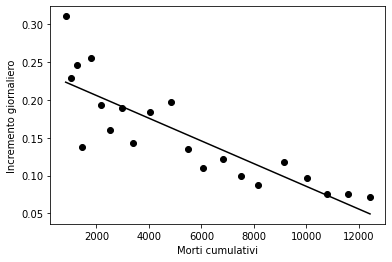

In [21]:
import pylab
x0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(x))

print('Fit: Y = {:.7f}[X] + {:.3f}'.format(m, x0),
      '(rms residual = {:.5f})'.format(rms))

pylab.plot(x, y, 'o', color='k')
pylab.plot(x, pfit(x), color='k')
pylab.xlabel('Morti cumulativi')
pylab.ylabel('Incremento giornaliero')
pylab.show()

In [22]:
XMAX = -x0/m
print(XMAX)

15722.6321041844
